#### Librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\gaby9\AppData\Local\Temp\ipykernel_7272\2085782635.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Metodología

#### Recolectar

In [2]:
df = pd.read_csv("C:/Users/gaby9/Downloads/data/covid_data.csv")
df

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5
...,...,...,...,...,...,...,...,...
23077,International,2020-02-28,0,0,NaN,NaN,NaN,NaN
23078,International,2020-02-29,0,2,NaN,NaN,NaN,NaN
23079,International,2020-03-01,0,0,NaN,NaN,NaN,NaN
23080,International,2020-03-02,0,0,NaN,NaN,NaN,NaN


#### Preparar

In [3]:
df_covid = df.copy()
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    23082 non-null  object 
 1   date                        23082 non-null  object 
 2   new_cases                   23082 non-null  int64  
 3   new_deaths                  23082 non-null  int64  
 4   population                  23018 non-null  float64
 5   aged_65_older_percent       20643 non-null  float64
 6   gdp_per_capita              20711 non-null  float64
 7   hospital_beds_per_thousand  19144 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.4+ MB


##### Comprobar la no existencia de datos faltantes

In [4]:
df_covid.isnull().sum()

location                         0
date                             0
new_cases                        0
new_deaths                       0
population                      64
aged_65_older_percent         2439
gdp_per_capita                2371
hospital_beds_per_thousand    3938
dtype: int64

In [5]:
df_covid.nunique()

location                       212
date                           163
new_cases                     2073
new_deaths                     634
population                     211
aged_65_older_percent          183
gdp_per_capita                 184
hospital_beds_per_thousand     100
dtype: int64

##### Identificación outliers

<Axes: >

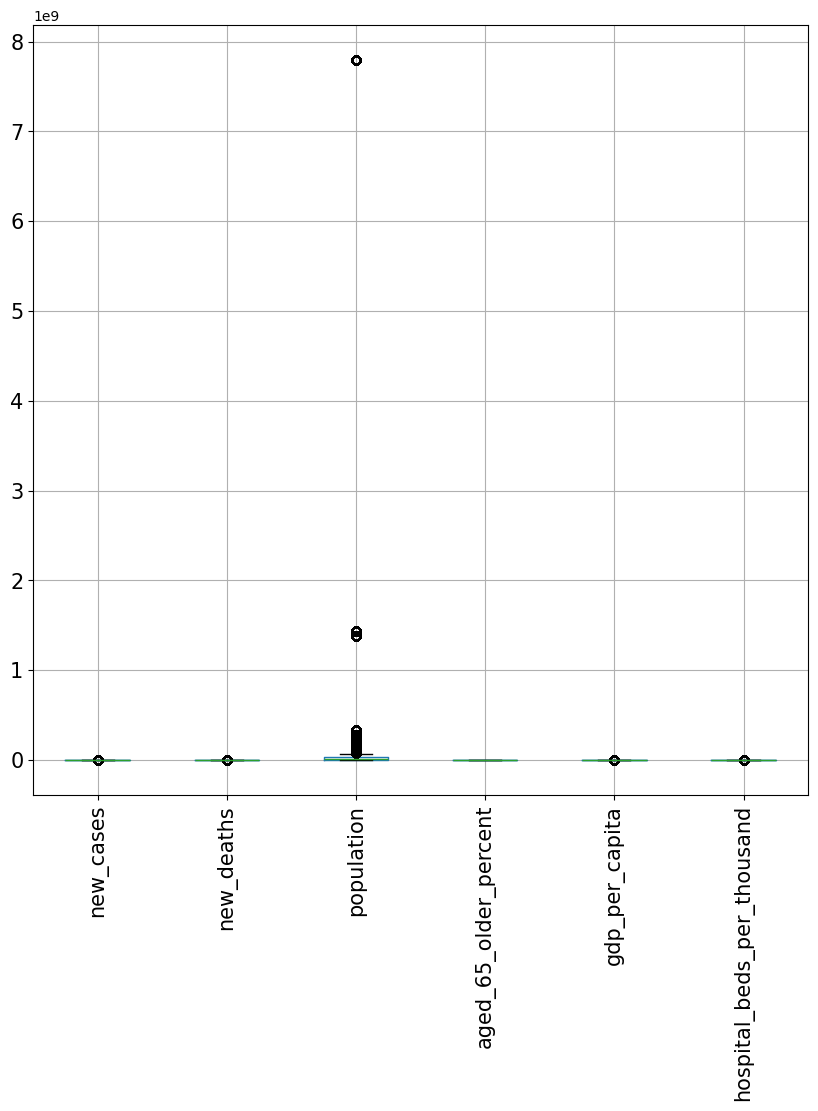

In [6]:
df_covid.boxplot(rot=90, fontsize=15,figsize = (10,10))

##### Agregar columna month

In [7]:
df_covid['month'] = pd.to_datetime(df_covid.date).dt.month_name()
df_covid

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,month
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5,December
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5,January
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5,January
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5,January
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5,January
...,...,...,...,...,...,...,...,...,...
23077,International,2020-02-28,0,0,NaN,NaN,NaN,NaN,February
23078,International,2020-02-29,0,2,NaN,NaN,NaN,NaN,February
23079,International,2020-03-01,0,0,NaN,NaN,NaN,NaN,March
23080,International,2020-03-02,0,0,NaN,NaN,NaN,NaN,March


#### Analizar

##### Distribución de la información por atributo

In [8]:
df_covid.describe()

,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
count,23082.000000,23082.000000,2.301800e+04,20643.000000,20711.000000,19144.000000
mean,624.769257,35.629062,1.037003e+08,9.758570,22708.384791,3.204687
std,5517.309068,330.986941,6.716897e+08,6.445662,21187.826121,2.593700
min,-2461.000000,-1918.000000,8.090000e+02,1.144000,661.240000,0.100000
25%,0.000000,0.000000,2.083380e+06,3.853000,6426.674000,1.400000
50%,3.000000,0.000000,9.449321e+06,7.646000,15524.995000,2.600000
75%,55.000000,1.000000,3.346920e+07,15.322000,35220.084000,4.210000
max,133510.000000,10520.000000,7.794799e+09,27.049000,116935.600000,13.800000


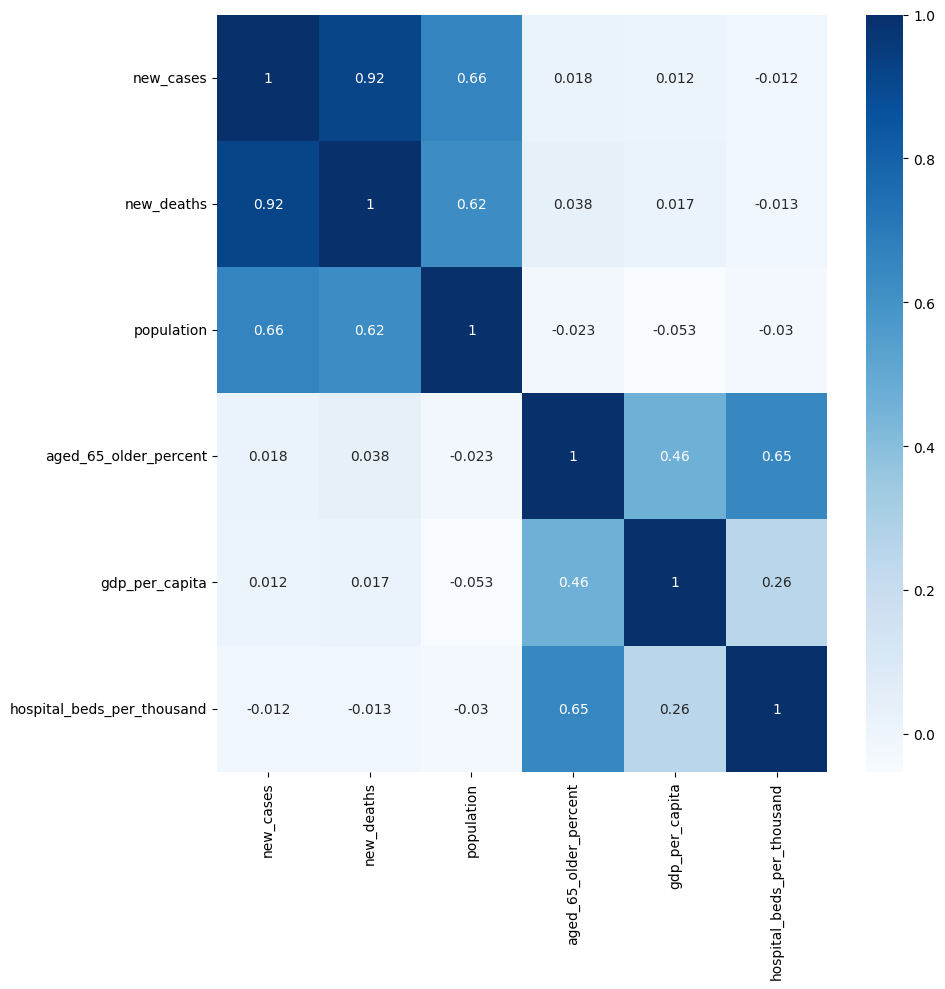

In [9]:
plt.figure(figsize=(10, 10))
correlation=df_covid.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='Blues')
plt.tight_layout()

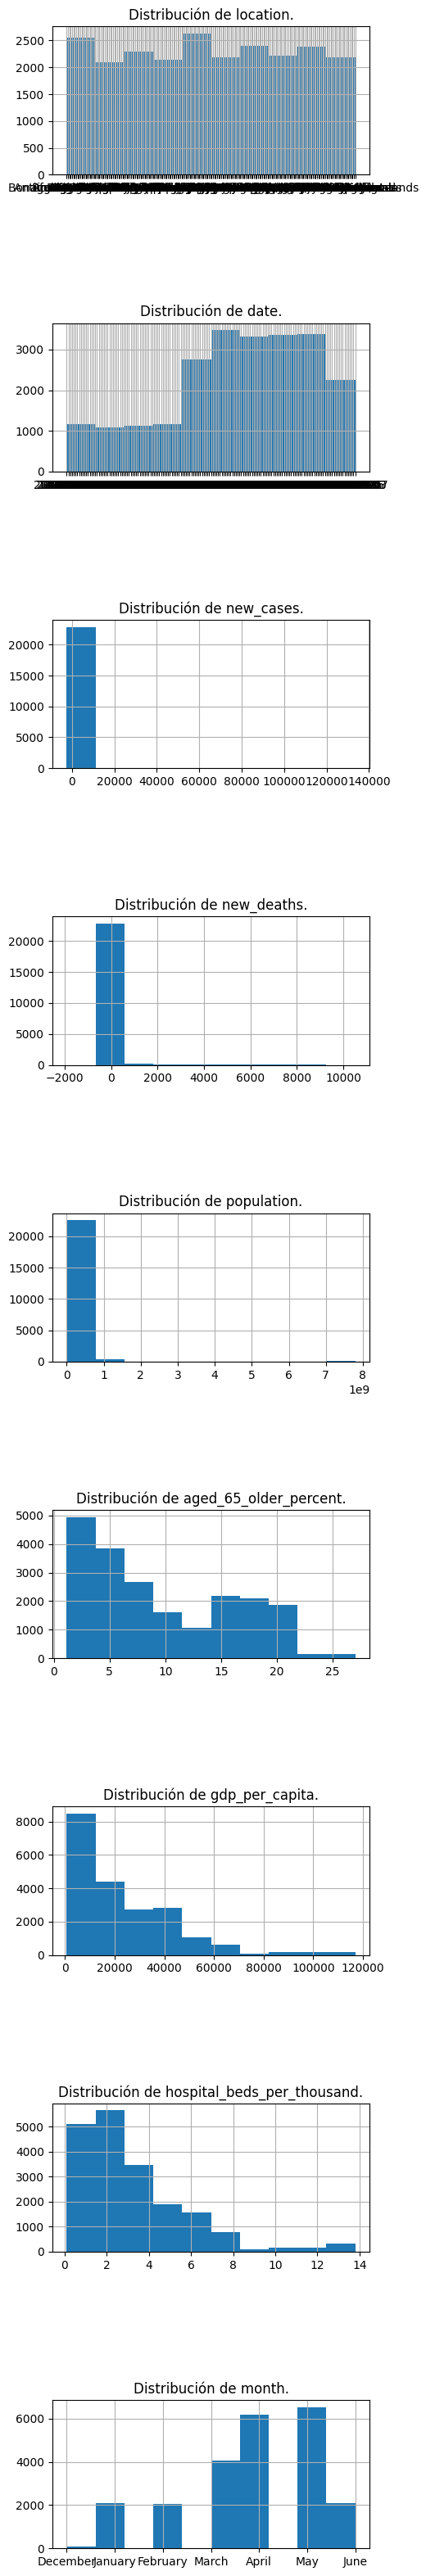

In [10]:
columnas = df_covid.columns.values
fig, axs = plt.subplots(df_covid.shape[1], 1, figsize = (5,40))
plt.subplots_adjust(hspace = 1)
for i, c in enumerate(columnas):
    dist_datos = df_covid[c]
    axs[i].set_title(f'Distribución de {c}.')
    axs[i].hist(dist_datos)
    axs[i].grid(True)

#### Ejercicio

#### Question 1: On which day in the month of March did the difference in cases between Italy and Germany exceed 10,000?

In [11]:
df_covid.set_index(df_covid.date, inplace=True)


In [12]:
df_covid_ = df_covid.copy()

In [13]:
#displays only Germany and Italy:
i_and_g= pd.concat([df_covid_[df_covid_.location == 'Germany' ], df_covid_[df_covid_.location == 'Italy']])

#Display only data in Germany and Italy between 2020-02-28 and 2020-03-20:
i_and_g = i_and_g[(i_and_g.date > '2020-02-27') & (i_and_g.date < '2020-03-21')]

cum_ger= i_and_g[i_and_g.location == 'Germany'].new_cases.cumsum()

cum_ity = i_and_g[i_and_g.location == 'Italy'].new_cases.cumsum()

i_and_g['country_cummulative'] = pd.concat([cum_ger,cum_ity])
i_and_g

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,month,country_cummulative
date,,,,,,,,,,
2020-02-28,Germany,2020-02-28,26,0,83783945.0,21.453,45229.245,8.00,February,26
2020-02-29,Germany,2020-02-29,10,0,83783945.0,21.453,45229.245,8.00,February,36
2020-03-01,Germany,2020-03-01,54,0,83783945.0,21.453,45229.245,8.00,March,90
2020-03-02,Germany,2020-03-02,18,0,83783945.0,21.453,45229.245,8.00,March,108
2020-03-03,Germany,2020-03-03,28,0,83783945.0,21.453,45229.245,8.00,March,136
2020-03-04,Germany,2020-03-04,39,0,83783945.0,21.453,45229.245,8.00,March,175
2020-03-05,Germany,2020-03-05,66,0,83783945.0,21.453,45229.245,8.00,March,241
2020-03-06,Germany,2020-03-06,138,0,83783945.0,21.453,45229.245,8.00,March,379
2020-03-07,Germany,2020-03-07,284,0,83783945.0,21.453,45229.245,8.00,March,663


In [14]:
k = pd.merge(cum_ity, cum_ger, on= 'date')
k.columns =['cum_ity', 'cum_ger']
dif = k[abs(k.cum_ger-k.cum_ity)>10000].index.min()
print(f'Answer 1: The day where the absolute difference in cummulative cases between Italy and Germany exceeded 10,000 cases was on {dif}')

Answer 1: The day where the absolute difference in cummulative cases between Italy and Germany exceeded 10,000 cases was on 2020-03-12


#### Question 2: Look at the cummulative number of confirmed cases in Italy between 2020-02-28 and 2020-03-20. Fit the exponential function (y=Ae^(Bx)) to this set to express cummulative cases as a function of days passed, by minimizing squared loss. What is the difference between the exponential curve and the total number of real cases on 2020-03-20?

In [15]:
from scipy.optimize import curve_fit

In [16]:
# Filtra los datos para Italia y el rango de fechas especificado
italy_data = df_covid[(df_covid['location'] == 'Italy') & (df_covid['date'] >= '2020-02-28') & (df_covid_['date'] <= '2020-03-20')]

# Calcula la cantidad acumulada de casos confirmados para cada día
italy_data['cumulative_cases'] = italy_data['new_cases'].cumsum()

# Define la función exponencial
def exponential_func(x, A, B):
    return A * np.exp(B * x)

# Ajusta la función exponencial a los datos utilizando mínimos cuadrados
x_data = np.arange(len(italy_data))
y_data = italy_data['cumulative_cases']
popt, pcov = curve_fit(exponential_func, x_data, y_data)

# Calcula el valor de la función exponencial en el día 20 de marzo de 2020
day_2020_03_20 = (pd.to_datetime('2020-03-20') - pd.to_datetime('2020-02-28')).days
exponential_value_on_2020_03_20 = exponential_func(day_2020_03_20, *popt)

# Calcula el número total de casos reales el 20 de marzo de 2020
real_cases_on_2020_03_20 = italy_data.loc[italy_data['date'] == '2020-03-20', 'cumulative_cases'].iloc[0]

# Calcula la diferencia entre la función exponencial y el número total de casos reales el 20 de marzo de 2020
difference = exponential_value_on_2020_03_20 - real_cases_on_2020_03_20

print("Diferencia entre la curva exponencial y el número total de casos reales el 20 de marzo de 2020:", difference.round().astype(int))

Diferencia entre la curva exponencial y el número total de casos reales el 20 de marzo de 2020: 1712


C:\Users\gaby9\AppData\Local\Temp\ipykernel_7272\257645700.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_data['cumulative_cases'] = italy_data['new_cases'].cumsum()


##### Question 3: What is the percentage of the total number of countries that have gdp greater than 10,000dollars and hospital beds per thousand greater than five?

In [17]:
# Filter the DataFrame for countries with GDP greater than $10,000 and hospital beds per thousand greater than 5
filtered_countries = df_covid[(df_covid['gdp_per_capita'] > 10000) & (df_covid['hospital_beds_per_thousand'] > 5)]

# Calculate the total number of countries that meet the criteria
total_countries = filtered_countries['location'].nunique()

# Calculate the total number of countries in the DataFrame
total_countries_in_df = df_covid['location'].nunique()

# Calculate the percentage
percentage = (total_countries / total_countries_in_df) * 100

print("Percentage of countries with GDP greater than $10,000 and hospital beds per thousand greater than 5:", round(percentage, 2))

Percentage of countries with GDP greater than $10,000 and hospital beds per thousand greater than 5: 10.38


##### Question 4: Which country is the 3rd highest  in terms of death rate? (drop all rows in the table with incomplete entries)

Answer 4: The 3rd highest country in terms of death rate is Spain 

location
Belgium           829.967102
United Kingdom    602.230174
Spain             580.389818
Italy             563.049467
Sweden            467.063461
Name: death_rate, dtype: float64


Text(0.5, 1.0, 'Top 10 countries with the highest death rate')

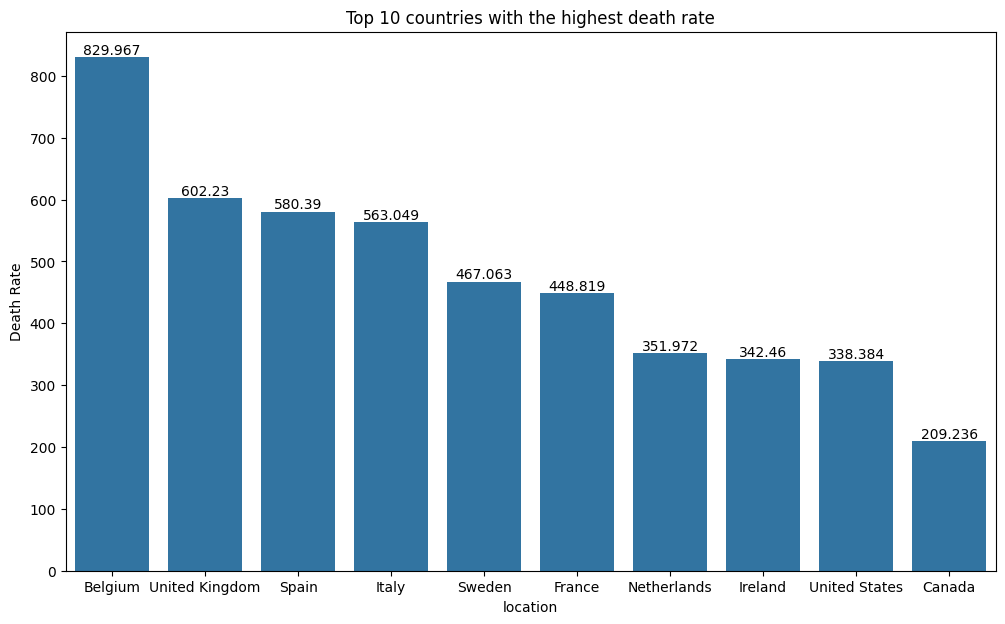

In [18]:
df_covid['death_rate'] = df_covid.new_deaths / df_covid.population *1000000
df_covid_ = df_covid.dropna()
ranki = df_covid_.groupby('location').death_rate.sum().sort_values(ascending=False)
print(f'Answer 4: The 3rd highest country in terms of death rate is {ranki.index[2]} \n')
print(ranki.head())
plt.figure(figsize=(12,7))
dr = sns.barplot(x=ranki.index[:10], y=ranki.values[:10])
dr.bar_label(dr.containers[0])
plt.ylabel('Death Rate')
plt.title('Top 10 countries with the highest death rate')

##### Question 5: What country  has the highest death rate, where percentage of its population aged 65 is above 20%? 

Answer 5: The country with the highest death rate, where percentage of its population aged 65 is above 20% is Italy 

location
Italy       563.049467
Portugal    146.321749
Germany     104.184638
Finland      58.476176
Bulgaria     24.034154
Greece       17.557231
Japan         7.266174
Name: death_rate, dtype: float64


Text(0.5, 1.0, 'Countries with the highest death rate, where percentage of its population aged 65 is above 20%')

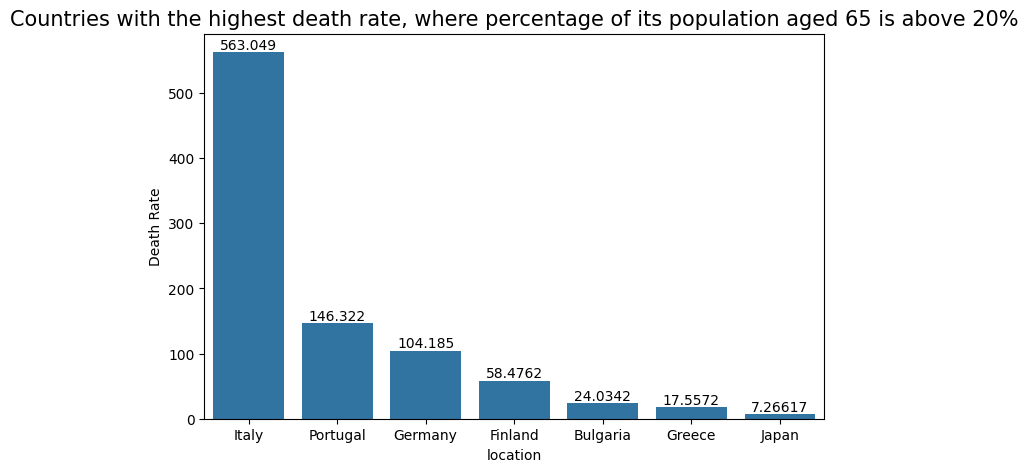

In [19]:
old_df = df_covid_[df_covid_.aged_65_older_percent >20]
ranki2 = old_df.groupby('location').death_rate.sum().sort_values(ascending=False)

print(f'Answer 5: The country with the highest death rate, where percentage of its population aged 65 is above 20% is {ranki2.index[0]} \n')
print(ranki2)
plt.figure(figsize=(8,5))
tc = sns.barplot(x=ranki2.index[:10], y=ranki2.values[:10])
plt.ylabel('Death Rate')

plt.bar_label(tc.containers[0])
plt.title('Countries with the highest death rate, where percentage of its population aged 65 is above 20%',size=15)


In [28]:
# Importar las bibliotecas necesarias
from sklearn.metrics import precision_score, recall_score, f1_score

# Filtrar los países donde más del 20% de la población tiene más de 65 años
old_df = df_covid_[df_covid_.aged_65_older_percent > 20]

# Calcular la suma de la tasa de mortalidad por país
death_rate_sum = old_df.groupby('location')['death_rate'].sum()

# Identificar los países con una tasa de mortalidad superior a 50 por millón de habitantes
above_50_rate = death_rate_sum[death_rate_sum > 50]
print(above_50_rate)
# Calcular el puntaje F1
y_true = [location in above_50_rate.index for location in old_df['location']]
y_pred = old_df['location'].isin(above_50_rate.index)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


location
Finland      58.476176
Germany     104.184638
Italy       563.049467
Portugal    146.321749
Name: death_rate, dtype: float64
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [30]:
# Paso 1: Calcular la probabilidad de que un país tenga un PIB superior a $10,000 y al menos 5 camas de hospital por cada 1000 habitantes
gdp_over_10000_and_beds_over_5 = ((df_covid_['gdp_per_capita'] > 10000) & (df_covid_['hospital_beds_per_thousand'] >= 5)).mean()

# Paso 2: Calcular la probabilidad de que un país tenga al menos 5 camas de hospital por cada 1000 habitantes
prob_beds_over_5 = (df_covid_['hospital_beds_per_thousand'] >= 5).mean()

# Paso 3: Aplicar la fórmula de Bayes
prob_gdp_over_10000_given_beds_over_5 = gdp_over_10000_and_beds_over_5 / prob_beds_over_5

print("Probability of GDP over $10,000 given at least 5 hospital beds per 1000 inhabitants:", prob_gdp_over_10000_given_beds_over_5)


Probability of GDP over $10,000 given at least 5 hospital beds per 1000 inhabitants: 0.9193251533742332


,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,death
location,,,,,
Belgium,11589616.0,18.571,42658.576,5.64,829.967102
United Kingdom,67886004.0,18.517,39753.244,2.54,602.230174
Spain,46754783.0,19.436,34272.360,2.97,580.389818
Italy,60461828.0,23.021,35220.084,3.18,563.049467
Sweden,10099270.0,19.985,46949.283,2.22,467.063461
...,...,...,...,...,...
Vietnam,97338583.0,7.150,6171.884,2.60,0.000000
Saint Vincent and the Grenadines,110947.0,7.724,10727.146,2.60,0.000000
Laos,7275556.0,4.029,6397.360,1.50,0.000000


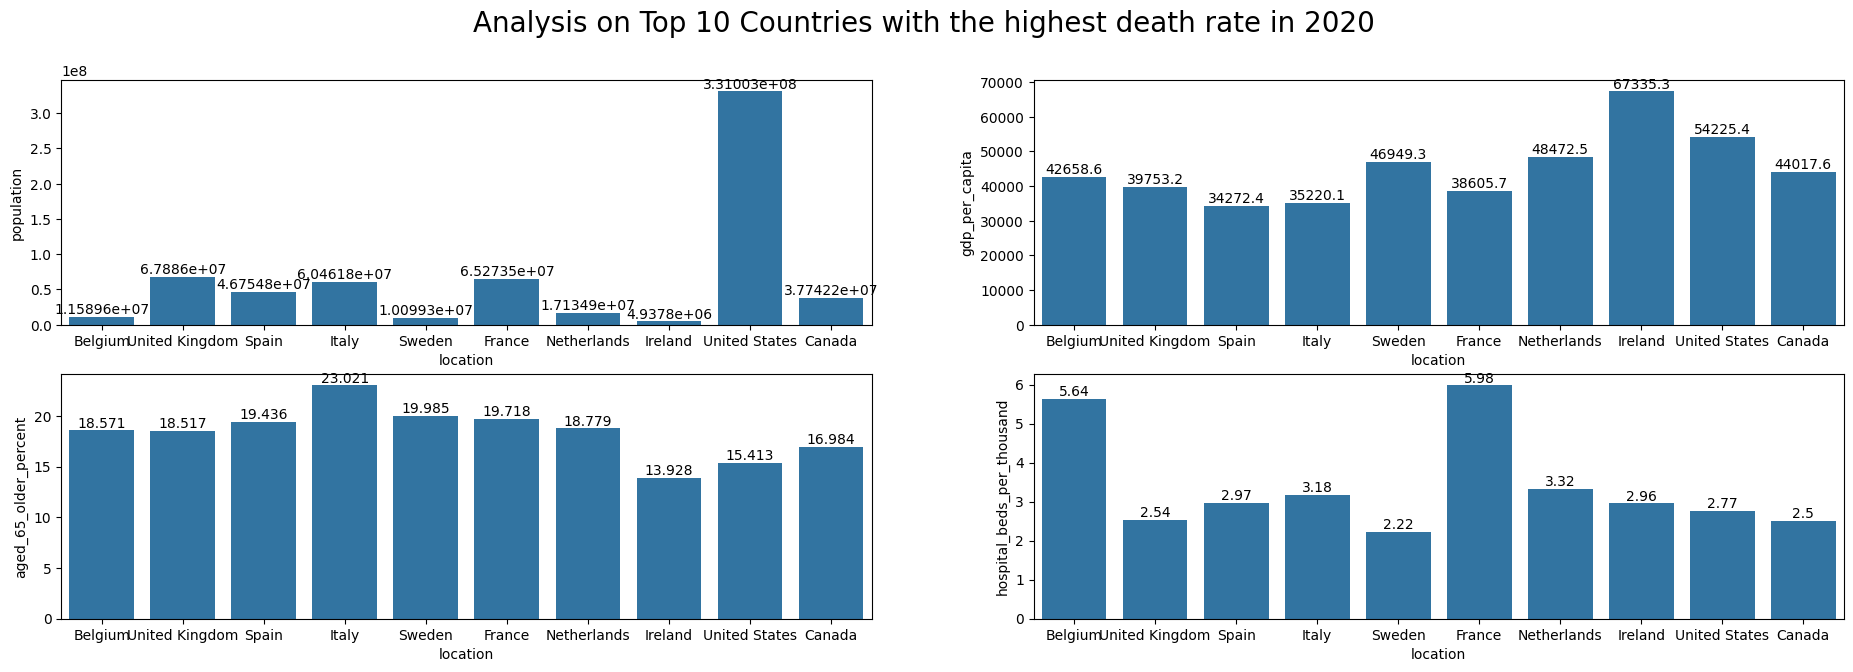

In [20]:
col = ['population', 'aged_65_older_percent', 'gdp_per_capita', 'hospital_beds_per_thousand']
df3 = df_covid_.groupby('location')[col].mean()
df3['death'] = ranki
df3 = df3.sort_values(ascending=False, by='death')
fig, axes = plt.subplots(2,2, figsize=(23,7))

for f in col:
    num = col.index(f)
    drw = sns.barplot(x=df3.index[:10], y=df3[f][:10], ax=axes[num%2, num//2])
    drw.bar_label(drw.containers[0])
    plt.suptitle("Analysis on Top 10 Countries with the highest death rate in 2020", size=20)
df3

Top Ten(10) Countries Case and Death in 2020 
                 new_cases  new_deaths
location                             
United States     1979850      112006
Brazil             739503       38406
Russia             485253        6141
United Kingdom     289140       40883
India              276583        7745
Spain              241966       27136
Italy              235561       34043
Peru               203736        5738
Germany            184861        8729
Iran               175927        8425


Text(0.5, 1.0, 'Top 10 number of deaths in countries, 2020')

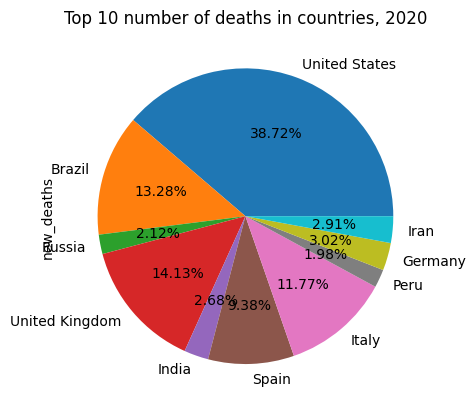

In [21]:
df4 = df_covid_.groupby('location')[['new_cases', 'new_deaths']].sum().sort_values(ascending=False, by='new_cases' )
df4 = df4[df4.index != 'World'][:10]
df4['new_deaths'].plot(kind='pie', autopct='%1.2f%%', subplots=True)
print("Top Ten(10) Countries Case and Death in 2020 \n", df4)
plt.title("Top 10 number of deaths in countries, 2020")

Top number of cases and deaths in United States across each month, 2020
           new_cases  new_deaths
month                          
December          0           0
January           6           0
February         60           0
March        164554        3170
June         209466        8225
May          730475       42815
April        875289       57796
Top number of cases and deaths in Brazil across each month, 2020
           new_cases  new_deaths
month                          
December          0           0
January           0           0
February          1           0
March          4578         159
April         73583        5307
June         241063        9572
May          420278       23368
Top number of cases and deaths in Russia across each month, 2020
           new_cases  new_deaths
month                          
December          0           0
January           0           0
February          2           0
March          1834          10
June          88678        

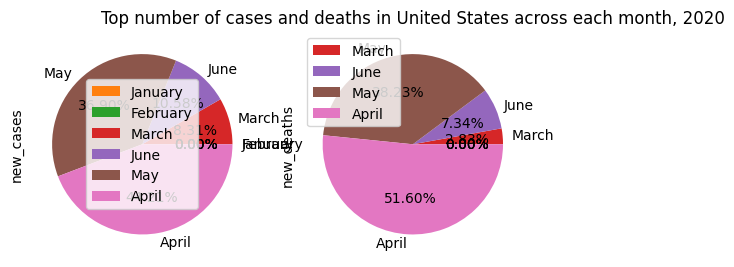

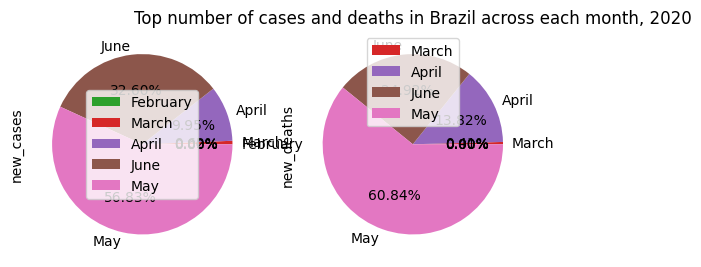

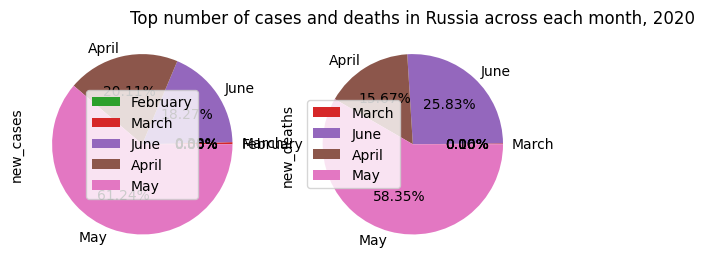

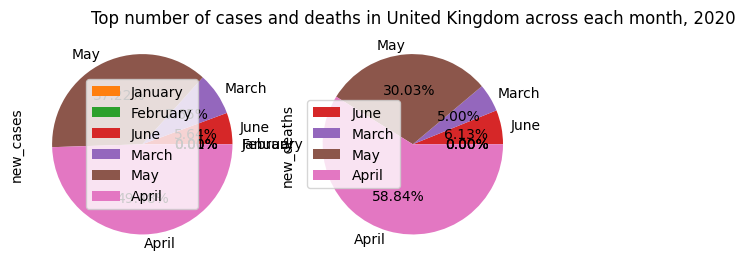

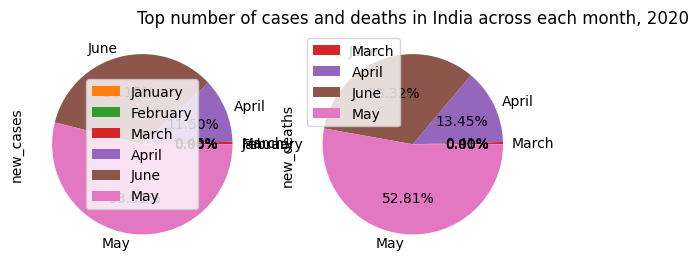

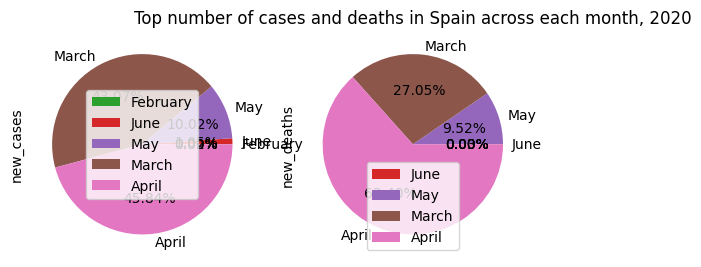

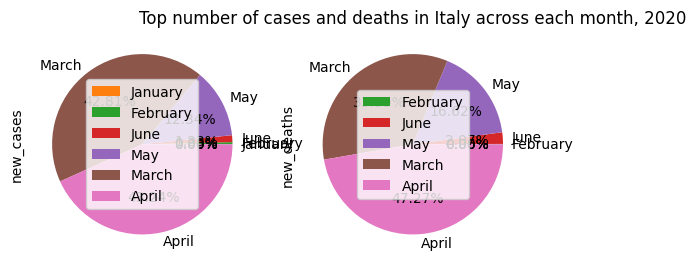

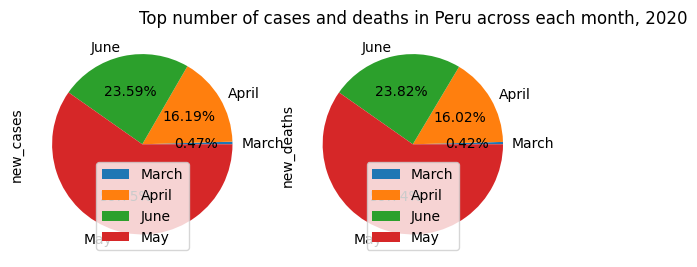

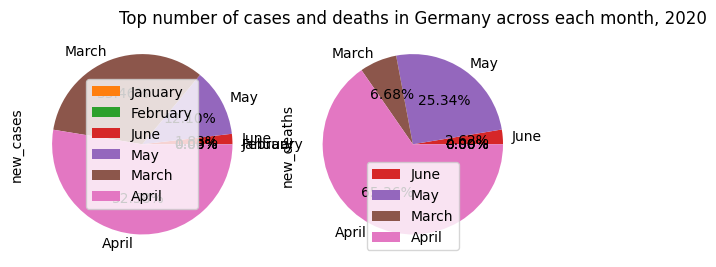

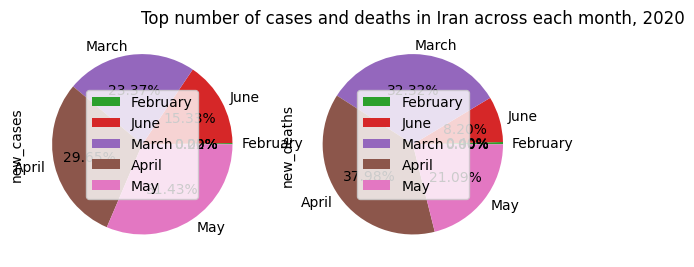

In [22]:
toppie = ['United States', 'Brazil', 'Russia', 'United Kingdom', 'India', 'Spain', 'Italy', 'Peru', 'Germany', 'Iran']

for l in toppie:
    us_ft = df_covid_[df_covid_.location == l].groupby('month')[['new_cases', 'new_deaths']].sum().sort_values(by='new_cases')
    us_ft.plot(kind='pie', autopct='%1.2f%%', subplots=True)
    print(f"Top number of cases and deaths in {l} across each month, 2020\n",us_ft)
    plt.title(f"Top number of cases and deaths in {l} across each month, 2020")

Text(0.5, 0.98, 'Top 10 number of deaths in each country across each month, 2020')

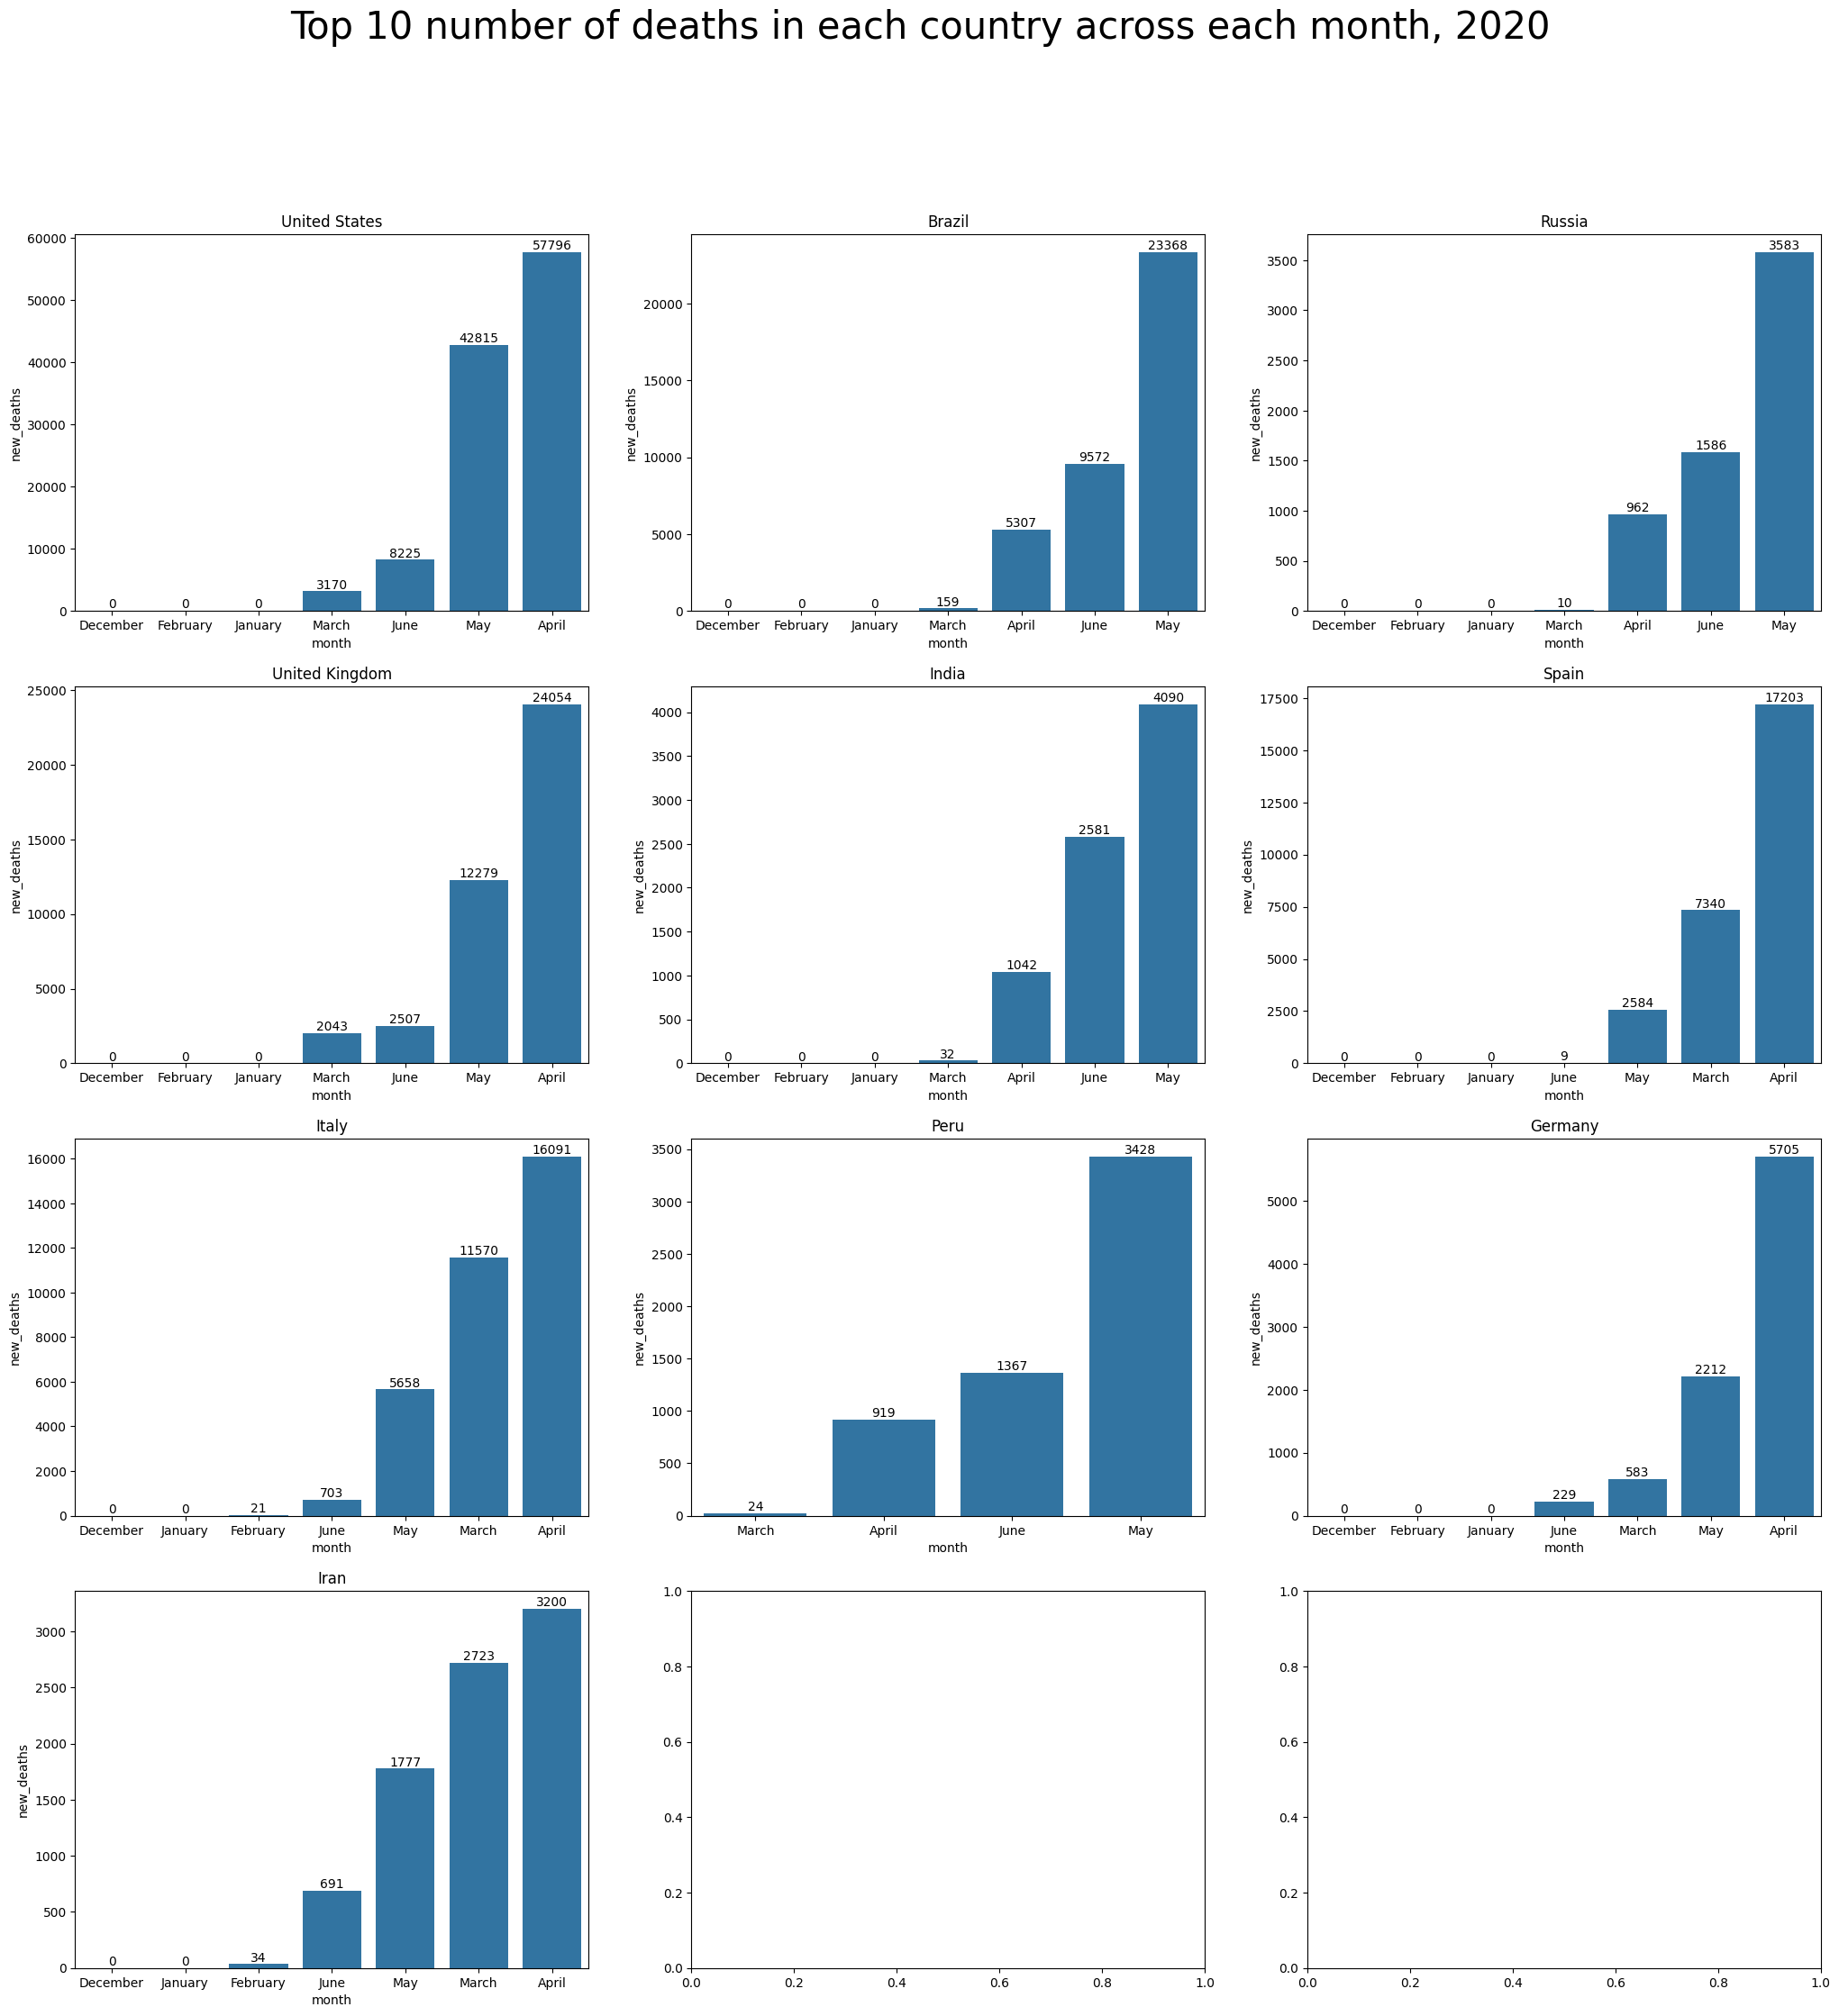

In [ ]:
fg, aw =plt.subplots(4,3, figsize=(25,25))

for l in toppie:
    num = toppie.index(l)
    us_ft = df_covid_[df_covid_.location == l].groupby('month')[['new_cases', 'new_deaths']].sum().sort_values(by='new_deaths')
    drw = sns.barplot(x=us_ft.index, y=us_ft.new_deaths, ax=aw[num//3, num%3])
    aw[num//3, num%3].set_title(l)
    drw.bar_label(drw.containers[0])
fg.suptitle("Top 10 number of deaths in each country across each month, 2020", size=30)